<a href="https://colab.research.google.com/drive/1F22gG4PqDIuM0R4zbzEKu1DlGbnHeNxM?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

## In this code, we are going to implement a basic image classifier:
  - Load the dataset (MNIST hand written digits)
  - Design a deep learning model and inspect its learnable parameters 
  - Train the model on the training data and inspect learning curves 
  - Evaluate the trained model on the never seen testing data
  - Save the model for later use
  - Load and use the model


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model
from PIL import Image
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10 #50

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


## Load the data

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [0]:
# load data, split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# small data
data_size = 10000
x_train = x_train[:data_size]
y_train = y_train[:data_size]
x_test = x_test[:data_size]
y_test = y_test[:data_size]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


## Build the DNN model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

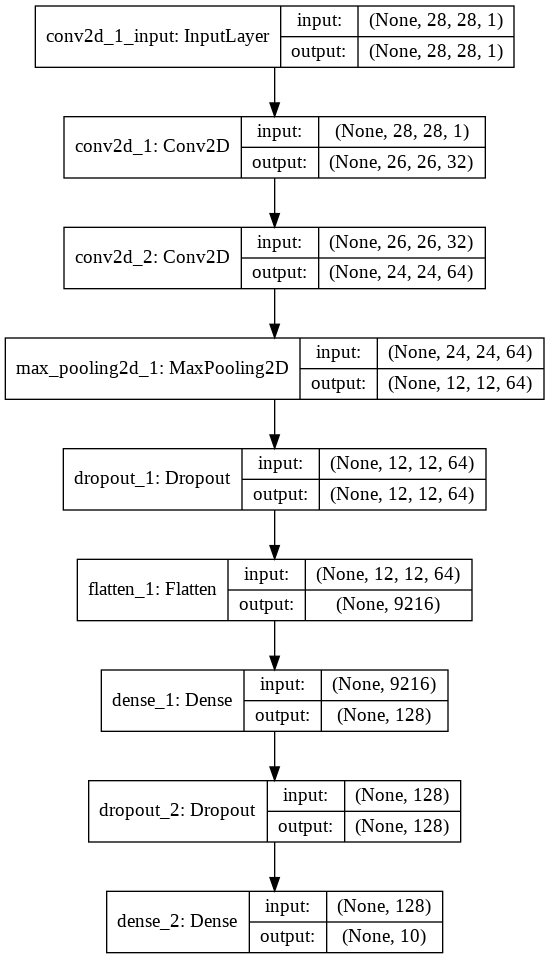

In [0]:
plot_model(model, to_file="mnistcnn.png", show_shapes=True)
img = Image.open('./mnistcnn.png')
img

## Train the model

In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 8s 804us/step - loss: 0.7668 - accuracy: 0.7672 - val_loss: 0.3214 - val_accuracy: 0.8920
Epoch 2/10
10000/10000 [==============================] - 1s 100us/step - loss: 0.2595 - accuracy: 0.9240 - val_loss: 0.1513 - val_accuracy: 0.9533
Epoch 3/10
10000/10000 [==============================] - 1s 101us/step - loss: 0.1707 - accuracy: 0.9506 - val_loss: 0.0972 - val_accuracy: 0.9689
Epoch 4/10
10000/10000 [==============================] - 1s 104us/step - loss: 0.1286 - accuracy: 0.9620 - val_loss: 0.0816 - val_accuracy: 0.9759
Epoch 5/10
10000/10000 [==============================] - 1s 105us/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.0972 - val_accuracy: 0.9696
Epoch 6/10
10000/10000 [==============================] - 1s 101us/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0790 - val_accuracy: 0.9761
Epoch 7/10
10000/10000 [==============================] - 1s 1

## Evalaute the model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.056657261818880214
Test accuracy: 0.9821000099182129


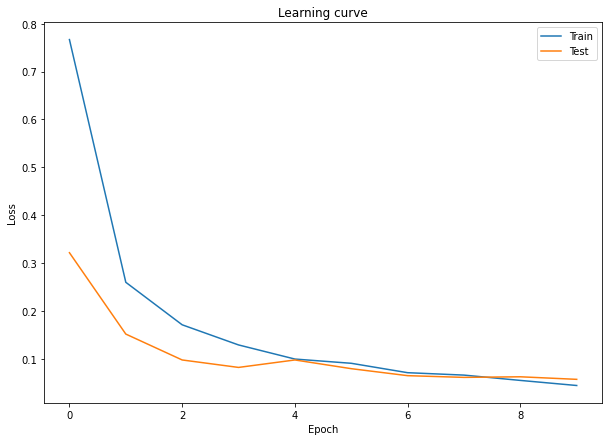

In [0]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')


plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

## Save and load the trained model

In [0]:
from keras.models import load_model
# save the model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [0]:
!ls -l

total 14172
-rw-r--r-- 1 root root    74071 May 10 13:41 mnistcnn.png
-rw-r--r-- 1 root root 14429984 May 10 13:41 my_model.h5
drwxr-xr-x 1 root root     4096 May  4 16:26 sample_data


In [0]:
# load the saved model
myloadednewmodel = load_model('my_model.h5')

In [0]:
myloadednewmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.056657261818880214
Test accuracy: 0.9821000099182129
